In [1]:
%autosave 0

Autosave disabled


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('bmh')

Books_df = pd.read_csv("C://Users//dnjsw//Desktop//프로젝트//Book//Books.csv",encoding='cp949')
Ratings_df = pd.read_csv('C://Users//dnjsw//Desktop//프로젝트//Book//Ratings.csv',encoding='cp949')
Users_df = pd.read_csv("C://Users//dnjsw//Desktop//프로젝트//Book//Users.csv", encoding='cp949')

## 각 데이터 컬럼확인
### Books_df
- ISBN : 도서 번호
- Book-Title : 도서 제목
- Book-Author : 도서 저자
- Year-Of-Publication : 출판연도
- Publisher : 출판사
- Image-URL-S/M/L : 책 표면 이미지 URL

### Ratings_df
- User-ID : user 번호
- ISBN : 도서 번호
- Book-Rating : 평점

### Users_df
- User-ID : user 번호
- Location : 거주지
- Age : 나이

In [3]:
Ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
# 데이터셋 shape

print(f'''Books_df : {Books_df.shape}
Ratings_df : {Ratings_df.shape}
Users_df : {Users_df.shape}
''')

Books_df : (271360, 8)
Ratings_df : (1149780, 3)
Users_df : (278858, 3)



In [5]:
Books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
Ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [7]:
Users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Text(0.5, 1.0, 'Age 이상치')

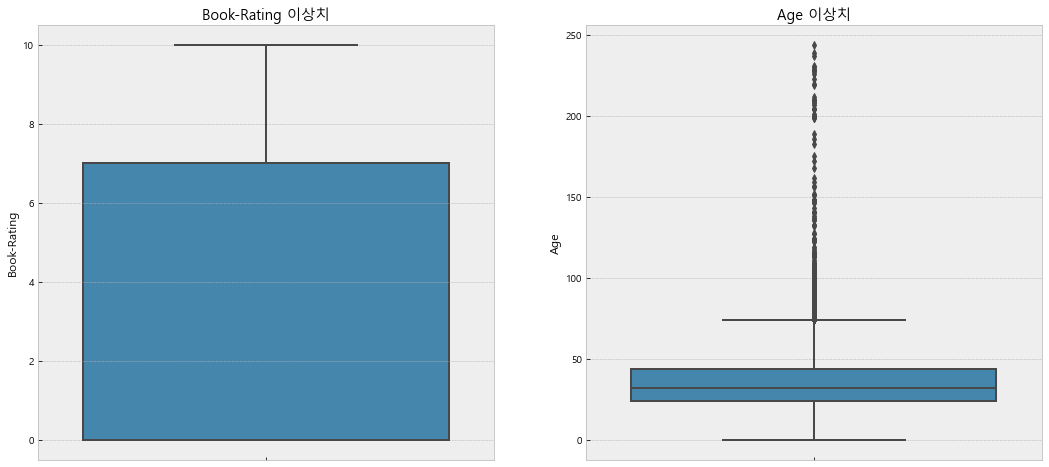

In [8]:
plt.rc('font', family='Malgun Gothic')

f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(y='Book-Rating', data = Ratings_df, ax=ax[0])
ax[0].set_title('Book-Rating 이상치')
sns.boxplot(y='Age', data = Users_df, ax=ax[1])
ax[1].set_title('Age 이상치')

In [9]:
pd.DataFrame(Ratings_df['Book-Rating'].value_counts()).reset_index().sort_values('index').rename({'index':'Rate'},axis=1)

,Rate,Book-Rating
0,0,716109
10,1,1770
9,2,2759
8,3,5996
7,4,8904
5,5,50974
6,6,36924
3,7,76457
1,8,103736
4,9,67541


In [10]:
# Age의 값 확인
print(sorted(Users_df.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [11]:
# 평점 최대 점수가 10점
# 1~10점까지 부여가능
# 0점은 책을 구매하고 평점을 입력하지 않았다는 것을 의미
sorted(Ratings_df['Book-Rating'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

왜도 : 0.675 <- 오른쪽으로 긴 꼬리


<AxesSubplot:ylabel='Frequency'>

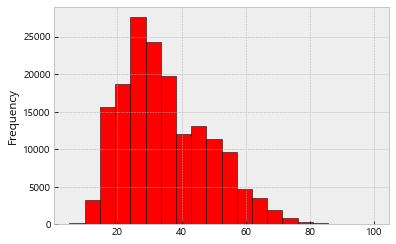

In [12]:
# Age 컬럼 -> 이상치를 Nan값으로
Users_df.loc[(Users_df.Age > 100)|(Users_df.Age <5), 'Age'] = np.nan
print('왜도 :',round(Users_df.Age.skew(axis=0, skipna=True),3),'<- 오른쪽으로 긴 꼬리')
Users_df.Age.plot.hist(bins=20, edgecolor='black', color='red')

In [13]:
round(Users_df.Age.skew(axis=0, skipna=True),3)

# 왜도가 양수 = 오른쪽으로 긴 꼬리

0.675

In [14]:
# Books_df 결측치 확인
# 작가 컬럼 결측치
Books_df[Books_df['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [15]:
# 출판사 컬럼 결측치 
Books_df[Books_df.Publisher.isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [16]:
# Image-URL-L 컬럼 결측치
Books_df[Books_df['Image-URL-L'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [17]:
# Books_df 결측치 처리(결측치가 많이 없어 직접 구글링 했음)
# Book-Author의 결측치 1개는 찾을 수 없었고
# Publisher에 대한 결측치는 'Mundania Press LLC', 'Bantam'
# Image-URL-L에 대한 결측치는 해당 row의 Book-Author 값이 없어
# 데이터가 밀려온 것으로 파악, Book-Author에 대한 결측치는
# 'Michael Teitelbaum', 'Le Clezio', 'James Buckley'
# Image-URL-L은 이미지에 대한 URL로 따로 결측값을 채워주지 않았음
Books_df['Book-Author'] = Books_df['Book-Author'].fillna('other')
Books_df.loc[Books_df.ISBN == '193169656X','Publisher'] = 'Mundania Press LLC'
Books_df.loc[Books_df.ISBN == '1931696993', 'Publisher'] = 'Bantam'
Books_df.loc[Books_df.ISBN=='078946697X','Book-Author']='Michael Teitelbaum'
Books_df.loc[Books_df.ISBN=='078946697X','Year-Of-Publication']= 2000
Books_df.loc[Books_df.ISBN=='078946697X','Publisher']='DK Publishing Inc'
Books_df.loc[Books_df.ISBN=='2070426769','Book-Author']='Le Clezio'
Books_df.loc[Books_df.ISBN=='2070426769','Year-Of-Publication']= 2003
Books_df.loc[Books_df.ISBN=='2070426769','Publisher']='Gallimard'
Books_df.loc[Books_df.ISBN=='0789466953','Book-Author']='James Buckley'
Books_df.loc[Books_df.ISBN=='0789466953','Year-Of-Publication']= 2000
Books_df.loc[Books_df.ISBN=='0789466953','Publisher']='DK Publishing Inc'

In [18]:
# 사용자의 지역 확인
# 도시, 국가로 표현되어 있음
print(Users_df.Location.unique())
len(Users_df.Location.unique())

['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']


57339

In [19]:
Users_df.Location

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: Location, Length: 278858, dtype: object

In [20]:
# 사용자의 지역을 Country로 묶어주려고 함
# country 컬럼

Users_df['Country'] = 'Korea'
for i in Users_df:
    Users_df['Country'] = Users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')
# 메타문자(정규식 표현)
# * -> 0개 이상 / ? -> 0개 또는 1개 / + -> 1개 이상
# \,+\s? -> 쉼표 1개 이상과 0개 또는 1개의 공백을 찾는다.
# (\w*\s?\w*) 영문자 0개이상,공백 0개또는 1개, 영문자 0개 이상을 찾는다.
# "(큰따옴표)* 0개 이상을 찾는다.

In [21]:
print(len(Users_df.Country.unique()))
Users_df.isnull().sum()

531


User-ID          0
Location         0
Age         112010
Country        362
dtype: int64

In [22]:
Users_df[['Location','Country']]

,Location,Country
0,"nyc, new york, usa",usa
1,"stockton, california, usa",usa
2,"moscow, yukon territory, russia",russia
3,"porto, v.n.gaia, portugal",portugal
4,"farnborough, hants, united kingdom",united kingdom
...,...,...
278853,"portland, oregon, usa",usa
278854,"tacoma, washington, united kingdom",united kingdom
278855,"brampton, ontario, canada",canada
278856,"knoxville, tennessee, usa",usa


In [23]:
Users_df.Country.unique()

array(['usa', 'russia', 'portugal', 'united kingdom', 'canada', 'spain',
       'australia', 'brazil', '', 'germany', 'mexico', 'china', 'italy',
       'distrito federal', 'france', 'netherlands', 'iraq', 'finland',
       'new zealand', 'india', 'ghana', 'switzerland', 'slovenia', 'iran',
       'peru', nan, 'vietnam', 'sri lanka', 'pakistan', 'denmark',
       'belgium', 'malaysia', 'turkey', 'philippines', 'greece',
       'colombia', 'norway', 'kuwait', 'chile', 'quit', 'lj', 'taiwan',
       'espa챰a', 'sweden', 'argentina', 'nigeria', 'london', 'bulgaria',
       'austria', 'romania', 'singapore', 'albania', 'egypt', 'tunisia',
       'uzbekistan', 'qatar', 'syria', 'saudi arabia', 'indonesia',
       'sudan', 'somewherein space', 'poland', 'thailand', 'ireland',
       'venezuela', 'paraguay', 'mozambique', 'morocco', 'afghanistan',
       'estonia', 'clackamas', 'lesotho', 'yugoslavia', 'slovakia',
       'costa rica', 'basque country', 'ethiopia', 'croatia', 'israel',
       '

In [24]:
# Country null값은 other로 변경
Users_df.loc[Users_df.Country.isnull(), 'Country'] = 'other'

In [25]:
Users_df['Country'].replace(['','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

In [26]:
# 나라별 유저

popular = Users_df.Country.value_counts().to_frame()[:10]
popular.rename(columns={'Country':'Count_Users_Country'}, inplace = True)

cm = sns.light_palette('green', as_cmap=True)
popular.style.background_gradient(cmap=cm)

,Count_Users_Country
usa,139735
canada,21659
united kingdom,18557
germany,17074
spain,13257
australia,12935
italy,11282
other,4950
france,3487
portugal,3390


### 불필요 컬럼 제거 / 데이터 조정

In [27]:
def Books_del(df):
    df.drop(['Year-Of-Publication','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)
    return print(df.shape)

def Users_del(df):
    df.drop(['Location'],axis=1,inplace=True)
    idx = df[df.Age.isnull()].index
    df.drop(idx, inplace=True)
    return print(df.shape)


In [28]:
Books_del(Books_df)
Users_del(Users_df)

(271360, 3)
(166848, 3)


In [29]:
Ratings_zero = Ratings_df[Ratings_df['Book-Rating']==0]
Ratings_zero

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
2,276727,0446520802,0
5,276733,2080674722,0
10,276746,0425115801,0
11,276746,0449006522,0
...,...,...,...
1149769,276704,059032120X,0
1149770,276704,0679752714,0
1149772,276704,080410526X,0
1149774,276704,0876044011,0


In [30]:
Ratings_zero1 = Ratings_zero.groupby(['ISBN']).count().reset_index()
Ratings_zero1.sort_values('Book-Rating',ascending=False,inplace=True)
Ratings_zero1

,ISBN,User-ID,Book-Rating
189293,0971880107,1921,1921
35095,0316666343,588,588
7124,0060928336,412,412
65636,0385504209,396,396
80145,044023722X,366,366
...,...,...,...
111767,0571114075,1,1
111768,0571114776,1,1
111769,0571117279,1,1
111770,0571117414,1,1


In [31]:
Ratings_df[Ratings_df.ISBN=='0971880107']

,User-ID,ISBN,Book-Rating
457,276925,0971880107,0
625,276939,0971880107,0
650,276954,0971880107,0
812,277042,0971880107,2
965,277157,0971880107,0
...,...,...,...
1145922,275793,0971880107,0
1148069,276113,0971880107,7
1148097,276147,0971880107,0
1148806,276487,0971880107,0


In [32]:
# 평점 0점으로 되어있는 Ratings_df 데이터 삭제
Ratings_df = Ratings_df[Ratings_df['Book-Rating']>0]

In [33]:
print('Ratings_df에서 User-ID의 unique값:',len(Ratings_df['User-ID'].unique()))
print('Ratings_df에서 ISBN의 unique값:',len(Ratings_df['ISBN'].unique()))
print('Users_df에서 User-ID의 unique값:',len(Users_df['User-ID'].unique()))
print('Books_df에서 ISBN의 unique값:',len(Books_df['ISBN'].unique()))
print("Users_df['User-ID'] - Ratings_df['User-ID'] =",len(Users_df['User-ID'].unique())-len(Ratings_df['User-ID'].unique()))
print("Books_df['ISBN'] - Ratings_df['ISBN'] =",len(Books_df['ISBN'].unique())-len(Ratings_df['ISBN'].unique()))

Ratings_df에서 User-ID의 unique값: 77805
Ratings_df에서 ISBN의 unique값: 185973
Users_df에서 User-ID의 unique값: 166848
Books_df에서 ISBN의 unique값: 271360
Users_df['User-ID'] - Ratings_df['User-ID'] = 89043
Books_df['ISBN'] - Ratings_df['ISBN'] = 85387


In [34]:
# User - Rating - Item의 정보를 맞춰야한다.
# User와 Rating은 User-ID로 연결되어 있고
# Item과 Rating은 ISBN으로 연결되어 있다.
# 따라서 Rating_df을 기준으로 User_df과 Books_df를 조정한다.

In [35]:
# Ratings_df에서 삭제된 유저 필터링
Ratings_df = Ratings_df[Ratings_df['User-ID'].isin(Users_df['User-ID'])]

# 평점이 있지만 책의 정보가 없는 평점정보는 삭제
Ratings_df = Ratings_df[Ratings_df['ISBN'].isin(Books_df['ISBN'])]

# 평점을 부여하지 않은 유저는 삭제
Users_df = Users_df[Users_df['User-ID'].isin(Ratings_df['User-ID'])]

# 평점을 부여받지 않은 책은 삭제
Books_df = Books_df[Books_df['ISBN'].isin(Ratings_df['ISBN'])]

In [36]:
print(len(Users_df['User-ID'].unique()))
print(len(Books_df['ISBN'].unique()))
print(len(Ratings_df['ISBN'].unique()))
print(len(Ratings_df['User-ID'].unique()))

17955
33444
33444
17955


In [37]:
Ratings_df.head()

,User-ID,ISBN,Book-Rating
3,276729,052165615X,3
23,276747,1885408226,7
44,276762,3453092007,8
66,276774,3442136644,9
77,276786,8437606322,8


In [38]:
# 데이터셋 shape

print(f'''Books_df : {Books_df.shape}
Ratings_df : {Ratings_df.shape}
Users_df : {Users_df.shape}
''')

Books_df : (33444, 3)
Ratings_df : (59169, 3)
Users_df : (17955, 3)



In [39]:
#Books_df.to_csv('Books4.csv')
#Ratings_df.to_csv('Ratings4.csv')
#Users_df.to_csv('Users4.csv')